In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [10]:
data = {
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}


df = pd.DataFrame(data)

print(df)


     Outlook Temperature Humidity  Windy Play
0      Rainy         Hot     High  False   No
1      Rainy         Hot     High   True   No
2   Overcast         Hot     High  False  Yes
3      Sunny        Mild     High  False  Yes
4      Sunny        Cool   Normal  False  Yes
5      Sunny        Cool   Normal   True   No
6   Overcast        Cool   Normal   True  Yes
7      Rainy        Mild     High  False   No
8      Rainy        Cool   Normal  False  Yes
9      Sunny        Mild   Normal  False  Yes
10     Rainy        Mild   Normal   True  Yes
11  Overcast        Mild     High   True  Yes
12  Overcast         Hot   Normal  False  Yes
13     Sunny        Mild     High   True   No


In [13]:
le = LabelEncoder()

for col in ['Outlook', 'Temperature', 'Humidity', 'Play']:
    df[col] = le.fit_transform(df[col])

df['Windy'] = df['Windy'].astype(int)

print(df)

    Outlook  Temperature  Humidity  Windy  Play
0         1            1         0      0     0
1         1            1         0      1     0
2         0            1         0      0     1
3         2            2         0      0     1
4         2            0         1      0     1
5         2            0         1      1     0
6         0            0         1      1     1
7         1            2         0      0     0
8         1            0         1      0     1
9         2            2         1      0     1
10        1            2         1      1     1
11        0            2         0      1     1
12        0            1         1      0     1
13        2            2         0      1     0


In [16]:
X = df.drop('Play',axis=True)
y = df['Play']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [18]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)

In [19]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [21]:
y_pred = dtree.predict(X_test)

In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[1 0]
 [1 1]]


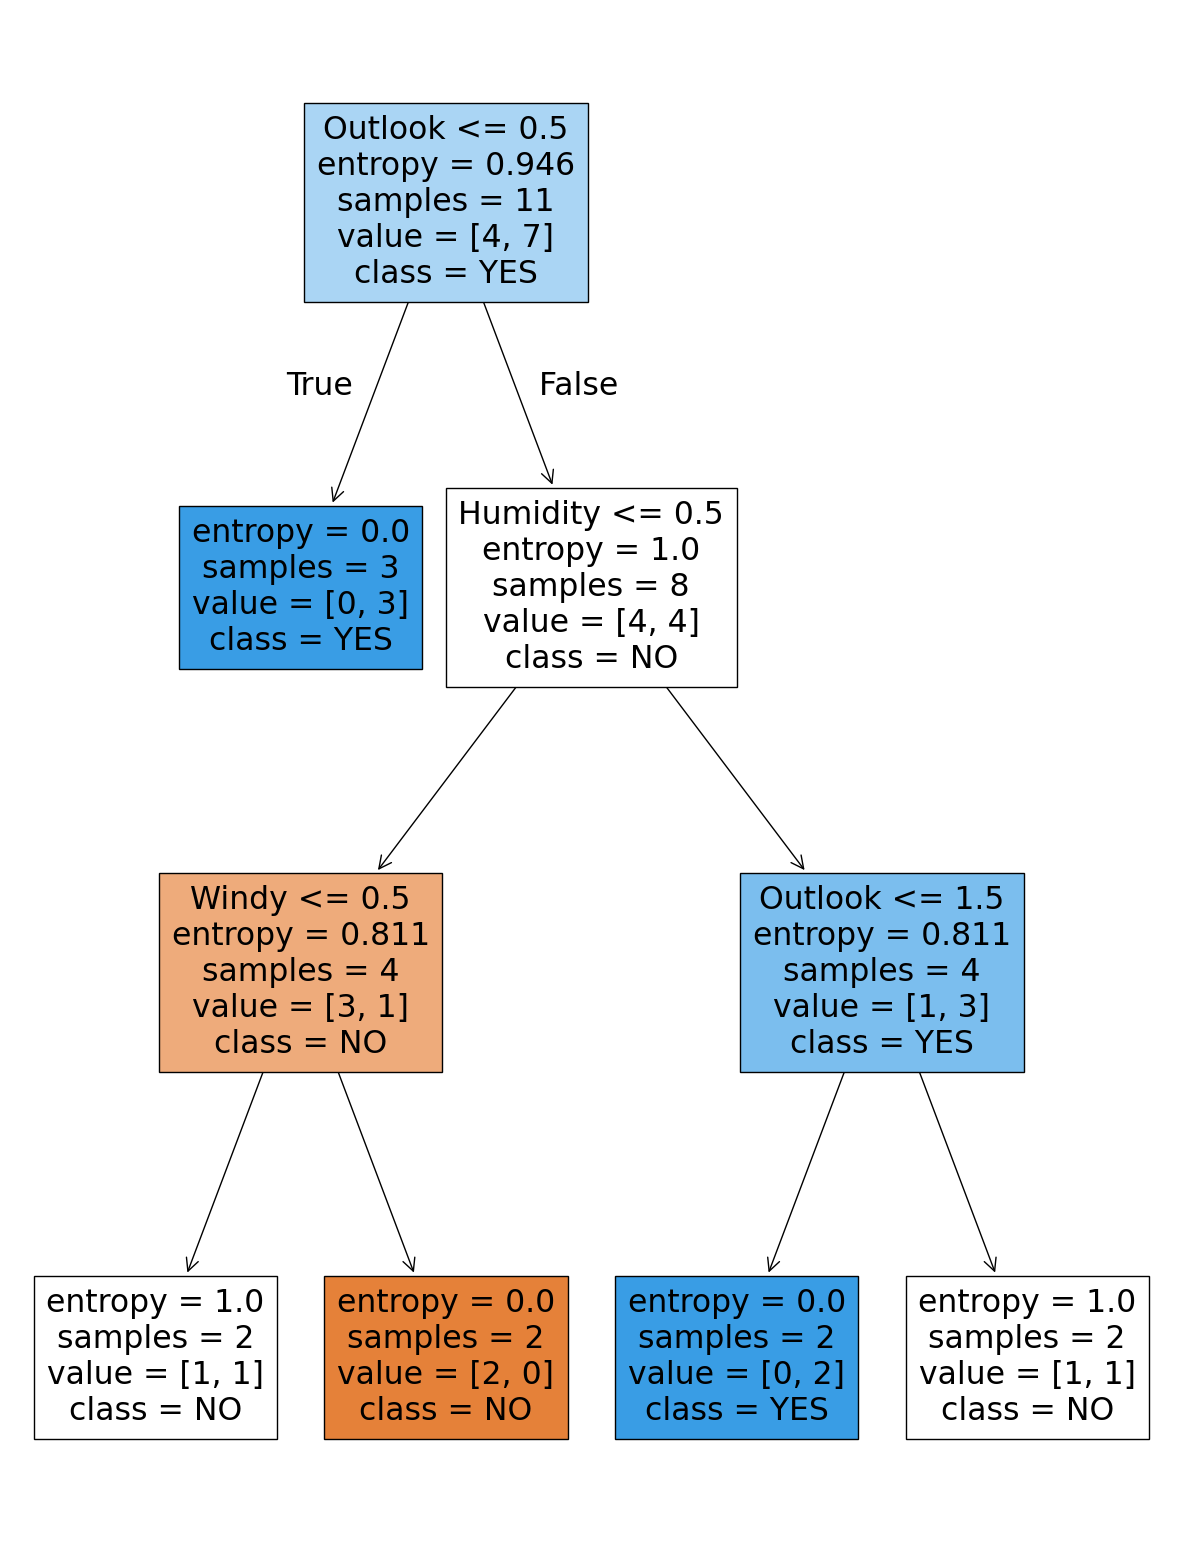

In [33]:
plt.figure(figsize=(15, 20)) 
plot_tree(dtree, feature_names=X.columns, class_names=["NO", "YES"], filled=True)
plt.show()